dataset-https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [30]:
df=pd.read_csv("housingdata.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [31]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [32]:
df.mean()

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64

In [33]:
df.fillna(df.mean(),inplace=True)

In [34]:
x = df.drop('MEDV',axis=1)
y=df['MEDV']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)
print("shape of scaled x train:",x_train_scaled.shape)
print("shape of scaled x test:",x_test_scaled.shape)

shape of scaled x train: (354, 13)
shape of scaled x test: (152, 13)


In [36]:
x_train_scaled[0]

array([2.11484693e-04, 6.00000000e-01, 9.05425220e-02, 0.00000000e+00,
       3.29218107e-02, 6.20616976e-01, 6.75782889e-01, 5.31276420e-01,
       0.00000000e+00, 1.47227533e-01, 3.19148936e-01, 9.91098896e-01,
       9.10596026e-02])

In [37]:
x_train_scaled[0].shape

(13,)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *


model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train_scaled[0].shape)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [44]:
history=model.fit(x=x_train_scaled,y=y_train,batch_size=1,verbose=1,epochs=100,validation_data=(x_test_scaled,y_test))

Epoch 1/100
354/354 [==============================] - 2s 3ms/step - loss: 140.5553 - mae: 8.2771 - val_loss: 60.0722 - val_mae: 5.3147
Epoch 2/100
354/354 [==============================] - 1s 2ms/step - loss: 37.9560 - mae: 4.4490 - val_loss: 31.0872 - val_mae: 3.8924
Epoch 3/100
354/354 [==============================] - 1s 2ms/step - loss: 28.1669 - mae: 3.7668 - val_loss: 27.1174 - val_mae: 3.6943
Epoch 4/100
354/354 [==============================] - 1s 2ms/step - loss: 24.3563 - mae: 3.4391 - val_loss: 26.0404 - val_mae: 3.5229
Epoch 5/100
354/354 [==============================] - 1s 2ms/step - loss: 23.0981 - mae: 3.3249 - val_loss: 24.0932 - val_mae: 3.3058
Epoch 6/100
354/354 [==============================] - 1s 2ms/step - loss: 19.7171 - mae: 3.0120 - val_loss: 33.3098 - val_mae: 4.0653
Epoch 7/100
354/354 [==============================] - 1s 2ms/step - loss: 20.8520 - mae: 3.0192 - val_loss: 21.6383 - val_mae: 3.3252
Epoch 8/100
354/354 [==============================] -

354/354 [==============================] - 1s 2ms/step - loss: 7.1221 - mae: 1.9327 - val_loss: 15.5044 - val_mae: 2.9324
Epoch 62/100
354/354 [==============================] - 1s 2ms/step - loss: 7.0301 - mae: 2.0085 - val_loss: 18.4655 - val_mae: 3.4440
Epoch 63/100
354/354 [==============================] - 1s 2ms/step - loss: 5.8161 - mae: 1.7590 - val_loss: 18.3326 - val_mae: 2.9066
Epoch 64/100
354/354 [==============================] - 1s 2ms/step - loss: 6.0654 - mae: 1.8484 - val_loss: 13.8515 - val_mae: 2.8737
Epoch 65/100
354/354 [==============================] - 1s 2ms/step - loss: 5.6225 - mae: 1.7253 - val_loss: 15.1509 - val_mae: 2.9334
Epoch 66/100
354/354 [==============================] - 1s 2ms/step - loss: 7.6299 - mae: 2.0330 - val_loss: 14.8496 - val_mae: 2.9237
Epoch 67/100
354/354 [==============================] - 1s 2ms/step - loss: 5.9623 - mae: 1.8344 - val_loss: 12.7247 - val_mae: 2.7151
Epoch 68/100
354/354 [==============================] - 1s 2ms/step 

In [40]:
test_input = [[0.00154995, 0.        , 0.28962963, 0.        , 0.27777778,
       0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542 ,
       0.88297872, 0.99665297, 0.16851064]]
print("actual output:",24.0)
print("predicted output:",model.predict(test_input))

actual output: 24.0
1/1 [==============================] - 0s 111ms/step
predicted output: [[23.06531]]


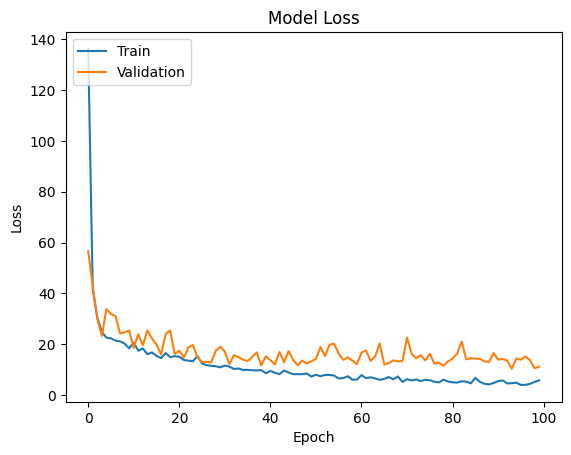

In [41]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
